11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8766 - loss: 0.4260 - val_accuracy: 0.9797 - val_loss: 0.0662
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9818 - loss: 0.0608 - val_accuracy: 0.9857 - val_loss: 0.0522
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9868 - val_loss: 0.0425

Test Accuracy without PCA: 0.9865000247955322
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6037 - loss: 1.2314 - val_accuracy: 0.9083 - val_loss: 0.2979
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9030 - loss: 0.3261 - val_accuracy: 0.9323 - val_loss: 0.2281
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9255 - loss: 0.2430 - val_accuracy: 0.9307 - val_loss: 0.2389

Test Accuracy with PCA: 0.9192000031471252


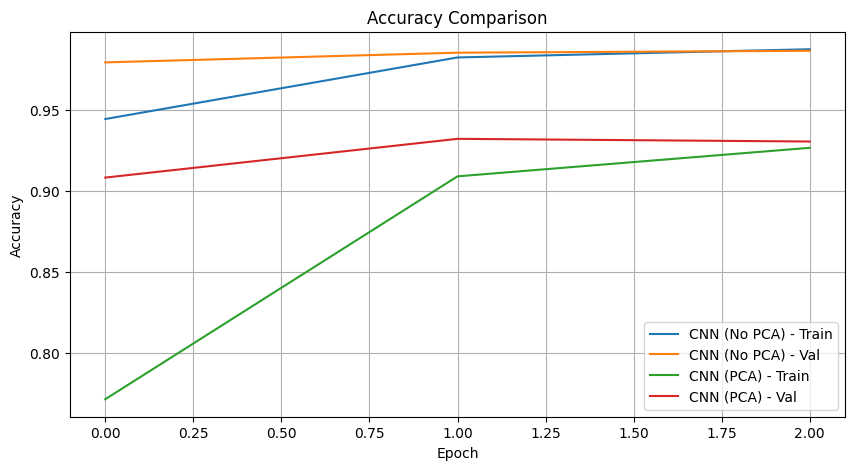

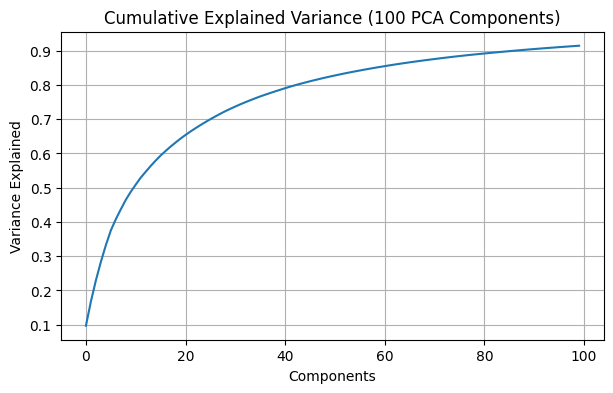

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical

# ------------------------------------------------
# Load MNIST
# ------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_cnn  = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

# ------------------------------------------------
# CNN Model
# ------------------------------------------------
def make_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ------------------------------------------------
# Training - WITHOUT PCA
# ------------------------------------------------
cnn1 = make_cnn((28,28,1))
hist1 = cnn1.fit(X_train_cnn, y_train_cat, epochs=3, batch_size=64,
                 validation_split=0.1, verbose=1)

acc1 = cnn1.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
print("\nTest Accuracy without PCA:", acc1)

# ------------------------------------------------
# PCA REDUCTION TO 100 COMPONENTS
# ------------------------------------------------
X_train_flat = X_train.reshape(-1, 784) / 255.0
X_test_flat  = X_test.reshape(-1, 784) / 255.0

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca  = pca.transform(X_test_flat)

# reshape 100 → 10×10 images
X_train_pca_img = X_train_pca.reshape(-1, 10, 10, 1)
X_test_pca_img  = X_test_pca.reshape(-1, 10, 10, 1)

# ------------------------------------------------
# Training - WITH PCA
# ------------------------------------------------
cnn2 = make_cnn((10,10,1))
hist2 = cnn2.fit(X_train_pca_img, y_train_cat, epochs=3, batch_size=64,
                 validation_split=0.1, verbose=1)

acc2 = cnn2.evaluate(X_test_pca_img, y_test_cat, verbose=0)[1]
print("\nTest Accuracy with PCA:", acc2)

# ------------------------------------------------
# Plot accuracy curves
# ------------------------------------------------
plt.figure(figsize=(10,5))

plt.plot(hist1.history['accuracy'], label='CNN (No PCA) - Train')
plt.plot(hist1.history['val_accuracy'], label='CNN (No PCA) - Val')

plt.plot(hist2.history['accuracy'], label='CNN (PCA) - Train')
plt.plot(hist2.history['val_accuracy'], label='CNN (PCA) - Val')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend()
plt.grid()
plt.show()

# ------------------------------------------------
# Plot PCA variance
# ------------------------------------------------
plt.figure(figsize=(7,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance (100 PCA Components)")
plt.xlabel("Components")
plt.ylabel("Variance Explained")
plt.grid()
plt.show()
